In [1]:
import pickle
from simulator import LocalSimulator, NonLocalSimulator, Simulator
from qiskit.visualization import plot_histogram
import os
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from utils import all_bitstrings

n_qubits = 5
with open('dataset/result.pkl', 'rb', ) as file:
    protocol_results = pickle.load(file)  # # ibmq_manila

M = np.zeros(shape=(2**n_qubits, 2**n_qubits))
# M = np.zeros(shape=(2**3, 2**3))
columns = defaultdict(list)
for circuit, stats_count  in zip(*protocol_results):
    measured_qubits = tuple([
        instruction.qubits[0].index
        for instruction in circuit
        if instruction.operation.name == 'measure'
    ])
    
    if 0 not in measured_qubits and 1 not in measured_qubits and 2 not in measured_qubits and 3 in measured_qubits and 4 in measured_qubits:
        continue

    apply_x_qubits = tuple([
        instruction.qubits[0].index
        for instruction in circuit
        if instruction.operation.name == 'x'
    ])

    real_bitstring = ['0'] * n_qubits
    for qubit in range(n_qubits):
        if qubit not in measured_qubits:
            real_bitstring[qubit] = '2'
        elif qubit in apply_x_qubits:
            real_bitstring[qubit] = '1'
    real_bitstring = ''.join(real_bitstring)
    
    new_stats_count = {}
    for bitstring, count in stats_count.items():
        bitstring = bitstring[::-1]
        new_bitstring = ['0'] * n_qubits
        for qubit in range(n_qubits):
            if qubit in measured_qubits:
                new_bitstring[qubit] = bitstring[measured_qubits.index(qubit)]
            else:
                new_bitstring[qubit] = '2'
        new_bitstring = ''.join(new_bitstring)
        new_stats_count[new_bitstring] = count
    stats_count = new_stats_count

    # fig, ax = plt.subplots()
    # plot_histogram(stats_count, title = real_bitstring, ax = ax)
    # fig.savefig(os.path.join('temp/fig/ibmq_manila_protocols', real_bitstring + '.svg'))
    # plt.close()
    
    for measure_bitstring, count in stats_count.items():
        for _ in range(count):
            for qubit in range(n_qubits):
                columns[f'{qubit}_set'].append(real_bitstring[qubit])
                columns[f'{qubit}_read'].append(measure_bitstring[qubit])
                columns[f'{qubit}_measure'].append(real_bitstring[qubit] != '2')
                columns[f'{qubit}_error'].append(real_bitstring[qubit] != measure_bitstring[qubit])
                
    if '2' not in real_bitstring:
        P = [
            stats_count[bitstring] if bitstring in stats_count else 0
            for bitstring in all_bitstrings(n_qubits)
            # for bitstring in all_bitstrings(3)
        ]
        # P = np.array(P)
        M[:,int(real_bitstring, base=2)] = P / np.sum(P)
        

/var/folders/4h/kdt41ym54rg5__k93lm_0wy80000gn/T/ipykernel_14617/433317508.py:23: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  instruction.qubits[0].index
/var/folders/4h/kdt41ym54rg5__k93lm_0wy80000gn/T/ipykernel_14617/433317508.py:32: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  instruction.qubits[0].index


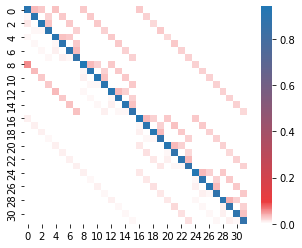

In [59]:
from matplotlib.colors import LinearSegmentedColormap

#练习的数据：
# data=pd.DataFrame(np.log(M*100000))
data=pd.DataFrame(M)
# RGB
colors = np.array([[256, 256, 256], [236, 60, 62],  [34, 120, 181],])
'''xia <- shang'''
# colors.reverse()
colors = np.array(colors) / 256
pos = [0, 0.1, 1]  # 定义颜色的位置
cmap = LinearSegmentedColormap.from_list('my_colormap', list(zip(pos, colors)))

fig = plt.figure(figsize=(5, 4))
#绘制热度图：
sns.heatmap(data, cmap = cmap)

fig.savefig('M_manila.svg')
plt.show()

In [25]:
np.where(M > 0.01)[0].size

135

In [ ]:
# O(n^3) 矩阵求逆

In [26]:
2**n_qubits**2

33554432

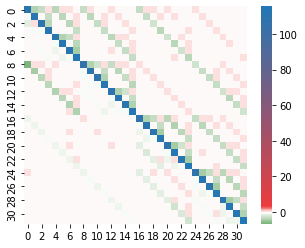

In [60]:

#练习的数据：
# data=pd.DataFrame(np.log(M*100000))
M_inv = np.linalg.inv(M) * 100
data= pd.DataFrame(M_inv)
# RGB
colors = np.array([[126, 181, 126], [256, 256, 256], [236, 60, 62],  [34, 120, 181],])

'''xia <- shang'''
# colors.reverse()
colors = np.array(colors) / 256
pos = [0, 0.05, 0.08, 1]  # 定义颜色的位置
cmap = LinearSegmentedColormap.from_list('my_colormap', list(zip(pos, colors)))

fig = plt.figure(figsize=(5, 4))
#绘制热度图：
sns.heatmap(data, cmap = cmap)
fig.savefig('M_manila_inv.svg')
plt.show()

In [58]:
np.where(np.abs(M_inv) > 1e-4)[0].size, M_inv.size

(891, 1024)

In [46]:
M_inv

array([[ 1.10221606e+00, -4.08840074e-02, -3.18681897e-02, ...,
        -3.70053636e-07, -6.27295050e-06,  3.84437312e-06],
       [-6.07746277e-03,  1.10588530e+00,  1.36853493e-04, ...,
        -3.07124122e-05,  3.52264128e-06,  4.50935596e-06],
       [-1.38859466e-02,  6.59859969e-04,  1.09029756e+00, ...,
         1.07435379e-08,  7.02619256e-06, -3.10528811e-06],
       ...,
       [-5.87599623e-08,  2.55634497e-06, -9.60515445e-09, ...,
         1.14728021e+00,  3.81772994e-04, -3.03198843e-02],
       [ 2.22186516e-06, -8.69862873e-08,  1.85902957e-06, ...,
         4.21485902e-04,  1.12993525e+00, -4.15883109e-02],
       [-3.25741688e-08, -2.33152323e-07, -1.45928331e-07, ...,
        -1.05891885e-02, -9.53324662e-03,  1.15577744e+00]])

In [68]:
from simulator import LocalSimulator, NonLocalSimulator, Simulator, MeasurementAwareNonLocalSimulator as MALSimulator
M = NonLocalSimulator.gen_random_M(15)
        
from matplotlib.colors import LinearSegmentedColormap

# #练习的数据：
# # data=pd.DataFrame(np.log(M*100000))
# data=pd.DataFrame(M)
# # RGB
# colors = np.array([[256, 256, 256], [236, 60, 62],  [34, 120, 181],])
# '''xia <- shang'''
# # colors.reverse()
# colors = np.array(colors) / 256
# pos = [0, 0.1, 1]  # 定义颜色的位置
# cmap = LinearSegmentedColormap.from_list('my_colormap', list(zip(pos, colors)))

# fig = plt.figure(figsize=(5, 4))
# #绘制热度图：
# sns.heatmap(data, cmap = cmap)

# fig.savefig('M_manila.svg')
# plt.show()

In [69]:
M_inv = np.linalg.inv(M)  #15比特花了16分钟

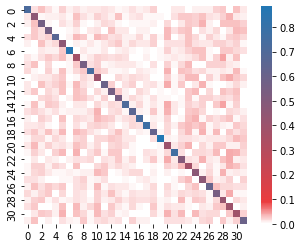

In [70]:
from simulator import LocalSimulator, NonLocalSimulator, Simulator, MeasurementAwareNonLocalSimulator as MALSimulator
M = NonLocalSimulator.gen_random_M(5)
        
from matplotlib.colors import LinearSegmentedColormap

#练习的数据：
# data=pd.DataFrame(np.log(M*100000))
data=pd.DataFrame(M)
# RGB
colors = np.array([[256, 256, 256], [236, 60, 62],  [34, 120, 181],])
'''xia <- shang'''
# colors.reverse()
colors = np.array(colors) / 256
pos = [0, 0.1, 1]  # 定义颜色的位置
cmap = LinearSegmentedColormap.from_list('my_colormap', list(zip(pos, colors)))

fig = plt.figure(figsize=(5, 4))
#绘制热度图：
sns.heatmap(data, cmap = cmap)

fig.savefig('M_manila.svg')
plt.show()